In [8]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [19]:
#image_directory = '/home/eitel/code/singulation_segm/self_deepmask/data/train_data/robotpush404,remove_bg,1/train2014/'
#annotation_file = '/home/eitel/code/singulation_segm/self_deepmask/data/train_data/robotpush404,remove_bg,1/annotations/instances_train2014.json'
image_directory = ' /mnt/revels/code/singulation_segm/arxiv_test/mask_generation/data/train/robotpush2316,remove_bg,1,flowfilter,15,actions,1,maxim,0/train2014/'
annotation_file = ' /mnt/revels/code/singulation_segm/arxiv_test/mask_generation/data/train/robotpush2316,remove_bg,1,flowfilter,15,actions,1,maxim,0/annotations/instances_train2014.json'


In [20]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [21]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
background object

Custom COCO supercategories: 
object background


('Image ids', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

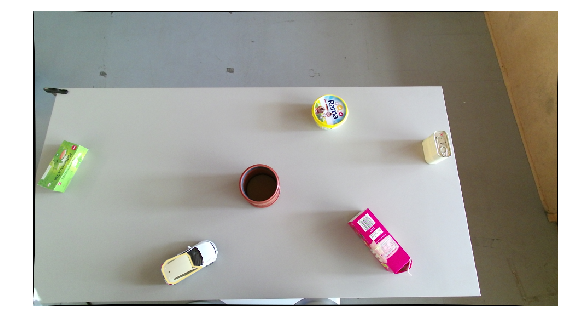

In [86]:
category_ids = example_coco.getCatIds(catNms=['workspace'])
image_ids = example_coco.getImgIds(catIds=category_ids)
print("Image ids",image_ids)
print("Category ids",category_ids)

#image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
image_data = example_coco.loadImgs(image_ids[245])[0]

# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
print(annotations)
example_coco.showAnns(annotations)